In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("Accidentalidad_en_Barranquilla.csv")
df.columns = [col.replace("\n", " ").strip() for col in df.columns]

In [3]:
df


,FECHA_ACCIDENTE,AÑO_ACCIDENTE,MES_ACCIDENTE,DIA_ACCIDENTE,HORA_ACCIDENTE,GRAVEDAD_ACCIDENTE,CLASE_ACCIDENTE,SITIO_EXACTO_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE,CANTIDAD_ACCIDENTES
0,01/01/2015 12:00:00 AM,2015,1,Jue,02:10:00:PM,Con heridos,Choque,VIA 40 CON 77,1,0,1
1,01/01/2015 12:00:00 AM,2015,1,Jue,02:15:00:PM,Solo daños,Choque,CALLE 14 CR 13,0,0,1
2,01/01/2015 12:00:00 AM,2015,1,Jue,02:20:00:PM,Solo daños,Choque,CL 74 CR 38C,0,0,1
3,01/01/2015 12:00:00 AM,2015,1,Jue,03:30:00:PM,Con heridos,Choque,CL 45 CR 19,2,0,1
4,01/01/2015 12:00:00 AM,2015,1,Jue,04:20:00:AM,Solo daños,Choque,CRA 15 CLLE 21,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
37239,09/30/2021 12:00:00 AM,2021,9,Jue,06:20:00:PM,Con heridos,Atropello,CARRERA 15 SUR CON CALLE 73,2,0,1
37240,09/30/2021 12:00:00 AM,2021,9,Jue,08:10:00:AM,Con heridos,Choque,CARRERA 56 FRENTE # 68 157,1,0,1
37241,09/30/2021 12:00:00 AM,2021,9,Jue,08:15:00:PM,Con heridos,Choque,CR 20 24 114,1,0,1
37242,09/30/2021 12:00:00 AM,2021,9,Jue,09:30:00:AM,Solo daños,Choque,CR 25B 74B 94,0,0,1


## Grafica 1

Cantidad de heridos y muertos por cada tipo de accidente

In [17]:
df1 = df.copy()
df1 = df1[["GRAVEDAD_ACCIDENTE","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CLASE_ACCIDENTE"]]
df1 = df1.groupby("CLASE_ACCIDENTE").sum().reset_index()
df1 = df1.sort_values(by='CANT_HERIDOS_EN _SITIO_ACCIDENTE', ascending=False)



fig = px.bar(df1,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="CLASE_ACCIDENTE",  labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "CLASE_ACCIDENTE": "Tipo de accidente",
                 },)
fig.show()
df2 = df.copy()
df2 = df2.groupby("CLASE_ACCIDENTE").sum().reset_index()
df2 = df2.sort_values(by='CANT_MUERTOS_EN _SITIO_ACCIDENTE', ascending=False)
fig = px.bar(df2,y="CANT_MUERTOS_EN _SITIO_ACCIDENTE",x="CLASE_ACCIDENTE",labels={
                     "CANT_MUERTOS_EN _SITIO_ACCIDENTE": "Cantidad de muertos",
                     "CLASE_ACCIDENTE": "Tipo de accidente",
                 },)
fig.show()
df1

,CLASE_ACCIDENTE,CANT_HERIDOS_EN _SITIO_ACCIDENTE
2,Choque,8980
0,Atropello,1677
1,Caida Ocupante,163
5,Volcamiento,130
4,Otro,121
3,Incendio,22


## Grafica 2

In [5]:
df3 = df.copy()

df3 = df3[["AÑO_ACCIDENTE","MES_ACCIDENTE","DIA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df4 = df3[["MES_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df3 = df3.groupby("AÑO_ACCIDENTE").sum().reset_index()
df4 = df4.groupby("MES_ACCIDENTE").sum().reset_index()
df4


,MES_ACCIDENTE,CANTIDAD_ACCIDENTES,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE
0,1,3009,958,19
1,2,3248,937,21
2,3,3321,1026,24
3,4,2979,772,16
4,5,3063,875,18
5,6,2986,813,21
6,7,3069,915,19
7,8,3299,1007,22
8,9,3325,1047,27
9,10,2985,914,24


In [21]:
fig = px.bar(df3,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="AÑO_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "AÑO_ACCIDENTE": "Año",
                 })
fig.show()
fig = px.bar(df4,y="CANT_HERIDOS_EN _SITIO_ACCIDENTE",x="MES_ACCIDENTE",labels={
                     "CANT_HERIDOS_EN _SITIO_ACCIDENTE": "Cantidad de heridos",
                     "MES_ACCIDENTE": "Mes",
                 })
fig.show()

## Grafica 3

In [7]:
df5 = df.copy()
df5 = df5[["HORA_ACCIDENTE","CANTIDAD_ACCIDENTES","CANT_HERIDOS_EN _SITIO_ACCIDENTE","CANT_MUERTOS_EN _SITIO_ACCIDENTE"]]
df5 = df5.groupby("HORA_ACCIDENTE").sum().reset_index()
df5

,HORA_ACCIDENTE,CANTIDAD_ACCIDENTES,CANT_HERIDOS_EN _SITIO_ACCIDENTE,CANT_MUERTOS_EN _SITIO_ACCIDENTE
0,01:00:00:AM,71,30,0
1,01:00:00:PM,606,121,1
2,01:01:00:PM,3,0,0
3,01:02:00:PM,2,0,0
4,01:03:00:PM,1,0,0
...,...,...,...,...
937,12:55:00:PM,26,7,0
938,12:56:00:PM,1,0,0
939,12:57:00:AM,1,1,1
940,12:58:00:PM,6,3,0


In [8]:
fig = px.bar(df5,x="HORA_ACCIDENTE",y="CANTIDAD_ACCIDENTES")
fig.show()

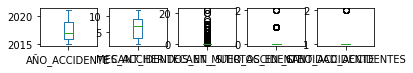

In [15]:
from matplotlib import pyplot
df.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False)
pyplot.show()

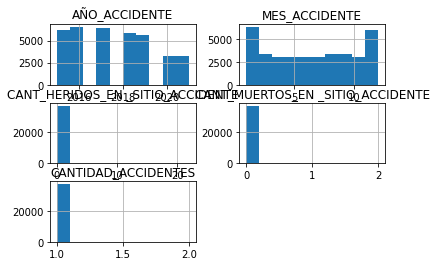

In [25]:
df.hist()
pyplot.show()